In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = 800
t = 5
t = np.linspace(0, t, fs*t+1)

In [3]:
A = 325
f = 50
y = A*np.sin(2*f*np.pi*t)

In [4]:
yrms = np.sqrt(np.mean(y**2))
yrms

229.78098305768538

In [5]:
Y = 2*np.fft.rfft(y)/y.size

In [6]:
np.isclose(Y[0], 0)

True

In [7]:
Yrms = np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))
Yrms

229.78098305768538

In [8]:
import pandas as pd

In [9]:
def rms(y):
    Y = 2*np.fft.rfft(y)/y.size
    return np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))

In [10]:
y = np.exp(-0.1*t)*A*np.sin(2*f*np.pi*t)

In [11]:
df = pd.DataFrame(y, index=t*pd.Timedelta('1s'), columns=['signal'])
df['rms'] = df.rolling(int(fs/f)).agg(rms)

In [12]:
r = df['signal'].resample('1s').agg(rms)

In [13]:
print(df[10:16])

                     signal         rms
00:00:00.012500 -229.522621         NaN
00:00:00.013750 -299.848273         NaN
00:00:00.015000 -324.512865         NaN
00:00:00.016250 -299.773320         NaN
00:00:00.017500 -229.407889         NaN
00:00:00.018750 -124.139136  229.580142


In [14]:
from scipy import signal

In [15]:
y = np.exp(-0.1*t)*A*(np.sin(2*f*np.pi*t) + 0.2*np.sin(8*f*np.pi*t) + 0.1*np.sin(16*f*np.pi*t)) + A/20*t + A/100

In [16]:
yd = signal.detrend(y, type='linear')

In [17]:
filt = signal.butter(5, [40,60], btype='band', fs=fs, output='sos', analog=False)

In [18]:
yfilt = signal.sosfilt(filt, yd)

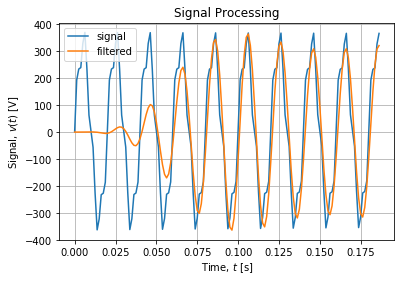

In [19]:
fig, axe = plt.subplots()
q = slice(0,150)
axe.plot(t[q], y[q], label='signal')
#axe.plot(t[q], yd[q], label='detrend')
axe.plot(t[q], yfilt[q], label='filtered')
axe.set_title("Signal Processing")
axe.set_ylabel('Signal, $v(t)$ $[\mathrm{V}]$')
axe.set_xlabel('Time, $t$ $[\mathrm{s}]$')
axe.set_ylabel('Signal, $v(t)$ $[\mathrm{V}]$')
axe.legend()
axe.grid()

In [20]:
yfilt

array([-2.58974716e-06,  4.17894034e-04,  4.31602258e-03, ...,
       -1.75952801e+02, -1.27651932e+02, -5.99316264e+01])

In [21]:
yfilt.size

4001

In [22]:
from scipy import fftpack

In [23]:
w = fftpack.fftfreq(y.size, d=1/fs)
w

array([ 0.        ,  0.19995001,  0.39990002, ..., -0.59985004,
       -0.39990002, -0.19995001])

In [24]:
q = np.abs(w-50)<1

In [25]:
w[q]

array([49.18770307, 49.38765309, 49.5876031 , 49.78755311, 49.98750312,
       50.18745314, 50.38740315, 50.58735316, 50.78730317, 50.98725319])

In [26]:
Y = fftpack.rfft(y)
Y

array([ 1.75878105e+05,  2.93600313e+02,  5.17504018e+04, ...,
        1.40453051e-01, -1.44775722e+02,  4.68176546e-02])

In [27]:
Y[~q]=0

In [28]:
np.sqrt(np.sum(Y[q]**2)/2)

795.06686816954

In [29]:
yf = fftpack.irfft(Y)

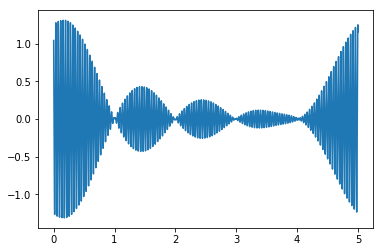

In [30]:
plt.plot(t, yf)

In [31]:
y

array([  3.25      , 192.61875798, 233.04288364, ..., -54.96210732,
       -30.39466505,  84.5       ])

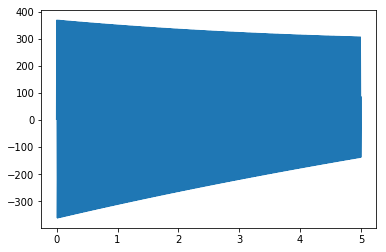

In [32]:
fig, axe = plt.subplots()
axe.plot(t, y)

In [33]:
f = fftpack.fftfreq(y.size, d=1/fs)

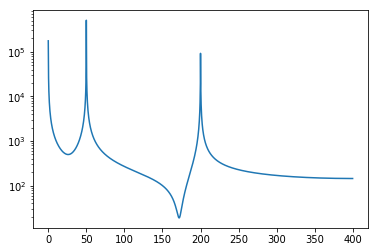

In [34]:
Y = fftpack.fft(y)
fig, axe = plt.subplots()
axe.semilogy(f[:y.size//2], np.abs(Y[:y.size//2]))

In [35]:
yd = signal.detrend(y, type='linear')

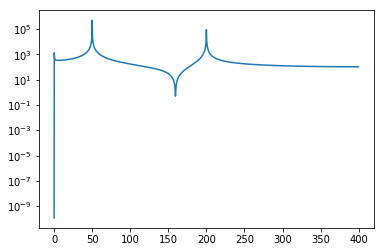

In [36]:
Y = fftpack.fft(yd)
fig, axe = plt.subplots()
axe.semilogy(f[:y.size//2], np.abs(Y[:y.size//2]))

In [37]:
q = np.abs(np.abs(f)-50)<10

In [38]:
Y = fftpack.fft(yd)/y.size

In [39]:
#Y[~q] = 0

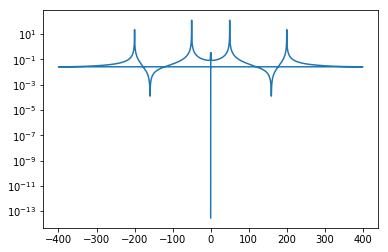

In [40]:
fig, axe = plt.subplots()
axe.semilogy(f, np.abs(Y))

In [41]:
yf = fftpack.ifft(Y)

In [42]:
yf

array([-0.0002765 +0.j,  0.04704891+0.j,  0.05714747+0.j, ...,
       -0.03461218+0.j, -0.0284768 +0.j,  0.00023474+0.j])

C:\Users\jlanderc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


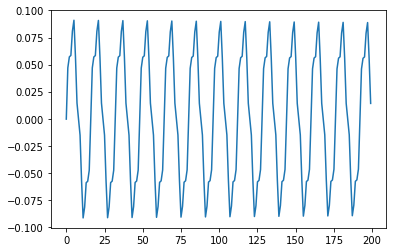

In [43]:
plt.plot(yf[:200])

In [44]:
np.sqrt(2*np.sum(Y*np.conj(Y)))

(263.4774571849526+0j)